[📥 Download Notebook](https://github.com/Mosqlimate-project/mosqlimate-client/blob/main/docs/tutorials/ensemble.ipynb)

In this notebook it will be provide examples about how the `mosqlient` package can be used to apply the ensemble methodologies proposed

In [1]:
import os
from dotenv import load_dotenv
load_dotenv()

api_key = os.getenv("API_KEY")

In [2]:
import numpy as np
import pandas as pd
import mosqlient as mosq
from mosqlient import get_prediction_by_id
from mosqlient.forecast import Ensemble
from mosqlient.prediction_optimize import get_df_pars
from mosqlient.forecast.viz import plot_preds

Get a prediction:

In [3]:
df = get_prediction_by_id(api_key=api_key, id=300).to_dataframe()

df = df.dropna(axis =1)

df.head()

,date,lower_90,pred,upper_90
0,2024-10-06,804.0,1491.5,3347.0
1,2024-10-13,867.0,1576.5,3671.0
2,2024-10-20,937.0,1746.0,3755.0
3,2024-10-27,987.0,1800.0,4064.0
4,2024-11-03,1045.0,1919.0,4517.0


Apply the log normal parametrization for the predictions:

In the cell below is used the log normal distribution minimized by the lower and upper values of the predictions. 

In [4]:
df_pars = get_df_pars(df, dist = 'log_normal', fn_loss = 'lower', return_estimations=True)

df_pars.head()

,date,lower_90,pred,upper_90,mu,sigma,fit_med,fit_lwr,fit_upr
0,2024-10-06,804.0,1491.5,3347.0,7.402709,0.433540,1640.423113,804.000001,3346.999984
1,2024-10-13,867.0,1576.5,3671.0,7.486629,0.438696,1784.028310,866.999999,3671.000017
2,2024-10-20,937.0,1746.0,3755.0,7.536763,0.421971,1875.749178,936.999997,3754.999988
3,2024-10-27,987.0,1800.0,4064.0,7.602297,0.430206,2002.790061,987.000002,4064.000019
4,2024-11-03,1045.0,1919.0,4517.0,7.683688,0.444973,2172.617094,1044.999998,4517.000043


In the cell below is used the log normal distribution minimized by the median and upper values of the predictions. 

In [5]:
df_pars = get_df_pars(df, dist = 'log_normal', fn_loss = 'median', return_estimations=True)

df_pars.head()

,date,lower_90,pred,upper_90,mu,sigma,fit_med,fit_lwr,fit_upr
0,2024-10-06,804.0,1491.5,3347.0,7.307537,0.491400,1491.499824,664.646809,3346.998281
1,2024-10-13,867.0,1576.5,3671.0,7.362962,0.513880,1576.499362,677.022772,3670.999470
2,2024-10-20,937.0,1746.0,3755.0,7.465083,0.465549,1745.999984,811.855561,3754.997921
3,2024-10-27,987.0,1800.0,4064.0,7.495542,0.495109,1799.999531,797.243380,4064.001522
4,2024-11-03,1045.0,1919.0,4517.0,7.559560,0.520438,1919.000397,815.267394,4516.999638


In the cell below is used the normal distribution minimized by the median and upper values of the predictions. 

In [6]:
df_pars = get_df_pars(df, dist = 'normal', fn_loss='median', return_estimations=True)

df_pars.head()

,date,lower_90,pred,upper_90,mu,sigma,fit_med,fit_lwr,fit_upr
0,2024-10-06,804.0,1491.5,3347.0,1491.500003,1128.063895,1491.500003,-363.999987,3346.999993
1,2024-10-13,867.0,1576.5,3671.0,1576.500005,1273.365590,1576.500005,-518.000004,3671.000014
2,2024-10-20,937.0,1746.0,3755.0,1745.999999,1221.385240,1745.999999,-262.999942,3754.999941
3,2024-10-27,987.0,1800.0,4064.0,1800.000009,1376.414304,1800.000009,-464.000052,4064.000069
4,2024-11-03,1045.0,1919.0,4517.0,1919.000014,1579.471838,1919.000014,-678.999966,4516.999995


In the cell below is used the normal distribution minimized by the lower and upper values of the predictions. 

In [7]:
df_pars = get_df_pars(df, dist = 'normal', fn_loss='lower', return_estimations=True)

df_pars.head()

,date,lower_90,pred,upper_90,mu,sigma,fit_med,fit_lwr,fit_upr
0,2024-10-06,804.0,1491.5,3347.0,2075.500020,773.017125,2075.500020,803.999998,3347.000042
1,2024-10-13,867.0,1576.5,3671.0,2268.999945,852.355441,2268.999945,867.000007,3670.999883
2,2024-10-20,937.0,1746.0,3755.0,2346.000009,856.611166,2346.000009,937.000026,3754.999992
3,2024-10-27,987.0,1800.0,4064.0,2525.499996,935.341588,2525.499996,986.999993,4063.999999
4,2024-11-03,1045.0,1919.0,4517.0,2781.000033,1055.413075,2781.000033,1045.000008,4517.000058


### Comparing the Ensemble techniques

Load the predictions that will be used to generate the ensemble

In [8]:
preds = []
for id in [146, 448, 649]:

    pred_ = get_prediction_by_id(api_key = api_key, id=id)
    
    df_pred = pred_.to_dataframe()

    df_pred = df_pred.dropna(axis = 1)

    df_pred['model_id'] = pred_.model.id 
    
    preds.append(df_pred)

df_preds_end = pd.concat(preds)

df_preds_end.date = pd.to_datetime(df_preds_end.date)

df_preds_end.head()

,date,lower_90,pred,upper_90,model_id
0,2023-10-08,103.0,416.0,1719.60,22
1,2023-10-15,110.0,445.0,1936.10,22
2,2023-10-22,115.0,484.5,2079.00,22
3,2023-10-29,118.0,536.5,2426.60,22
4,2023-11-05,140.0,566.0,2499.25,22


In [9]:
df_preds_end.model_id.unique()

array([22, 30, 34])

Load the data on probable cases that will be used to minimize the ensemble weights:

In [10]:
data = mosq.get_infodengue(
    api_key = api_key, 
    disease =  "dengue",
    start_date = "2023-10-08",
    end_date = "2024-06-02", 
    uf = 'RJ')

data = data[['data_iniSE', 'casprov']].set_index('data_iniSE')
data.index = pd.to_datetime(data.index)
data = data.resample('W-SUN').sum()

data.head()

100%|██████████| 10/10 [00:02<00:00,  4.32requests/s]


,casprov
data_iniSE,
2023-10-08,351
2023-10-15,451
2023-10-22,466
2023-10-29,519
2023-11-05,734


Plot the predictions versus the probable cases observed:

<Axes: xlabel='Date', ylabel='New cases'>

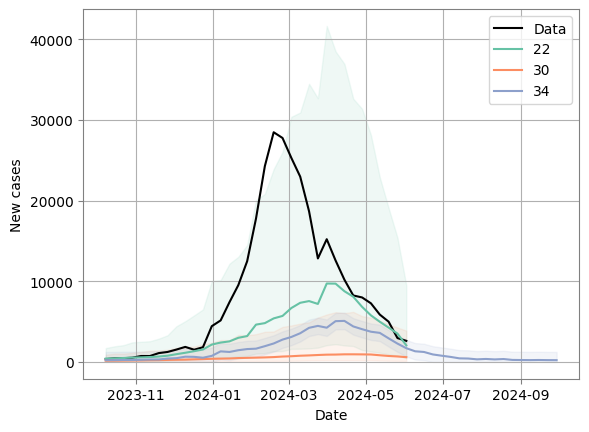

In [11]:
plot_preds(data, df_preds_end)

#### Apply the ensemble methodology

In [12]:
df_preds_end = df_preds_end.loc[df_preds_end.date <= '2024-06-02'].reset_index(drop=True)

Apply the linear mixture considering the same weights for all preds:

In [13]:
df_preds_end

,date,lower_90,pred,upper_90,model_id
0,2023-10-08,103.000000,416.000000,1719.600000,22
1,2023-10-15,110.000000,445.000000,1936.100000,22
2,2023-10-22,115.000000,484.500000,2079.000000,22
3,2023-10-29,118.000000,536.500000,2426.600000,22
4,2023-11-05,140.000000,566.000000,2499.250000,22
...,...,...,...,...,...
100,2024-05-05,2723.000133,3744.906093,4766.812052,34
101,2024-05-12,2579.764458,3601.670417,4623.576377,34
102,2024-05-19,1901.564551,2923.470510,3945.376470,34
103,2024-05-26,1251.085322,2272.991281,3294.897241,34


In [15]:
df_ = get_df_pars(df_preds_end, conf_level=0.9, dist='log_normal', fn_loss='median')

df_.head()

,date,lower_90,pred,upper_90,model_id,mu,sigma
0,2023-10-08,103.0,416.0,1719.60,22,6.030686,0.862789
1,2023-10-15,110.0,445.0,1936.10,22,6.098074,0.893913
2,2023-10-22,115.0,484.5,2079.00,22,6.183118,0.885504
3,2023-10-29,118.0,536.5,2426.60,22,6.285067,0.917516
4,2023-11-05,140.0,566.0,2499.25,22,6.338594,0.902908


In [16]:
df_["model_id"] = pd.Categorical(
            df_["model_id"], categories=[22, 30, 34], ordered=True
        )

df_.head()


,date,lower_90,pred,upper_90,model_id,mu,sigma
0,2023-10-08,103.0,416.0,1719.60,22,6.030686,0.862789
1,2023-10-15,110.0,445.0,1936.10,22,6.098074,0.893913
2,2023-10-22,115.0,484.5,2079.00,22,6.183118,0.885504
3,2023-10-29,118.0,536.5,2426.60,22,6.285067,0.917516
4,2023-11-05,140.0,566.0,2499.25,22,6.338594,0.902908


<Axes: xlabel='Date', ylabel='New cases'>

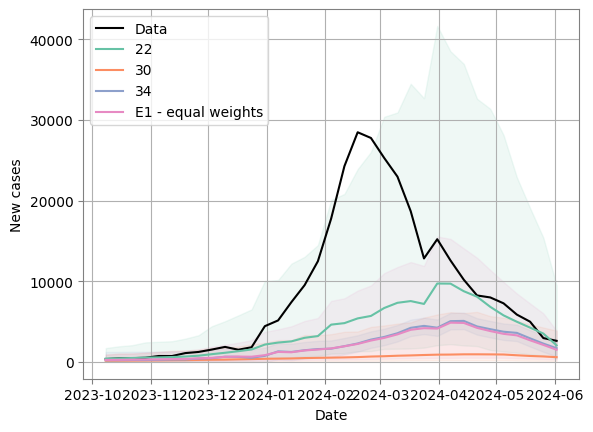

In [17]:
e1 = Ensemble(df = df_preds_end,
        order_models = [22, 30, 34], 
        dist = 'log_normal',
        mixture = 'linear',
        fn_loss = 'median')

preds_e1 = e1.apply_ensemble(weights = np.array([1/3,1/3,1/3]))

preds_e1['model_id'] = 'E1 - equal weights'

df_preds_ensemble = pd.concat([df_preds_end, preds_e1], axis = 0)

plot_preds(data, df_preds_ensemble)

Optimize the weigths in the ensemble 

Rename the columns of the dataset with the cases:

In [18]:
data_ens =data.reset_index().rename(columns = {'data_iniSE': 'date',
                                               'casprov':'casos'})

data_ens.head()

,date,casos
0,2023-10-08,351
1,2023-10-15,451
2,2023-10-22,466
3,2023-10-29,519
4,2023-11-05,734


Optimize the weights using the log score:

<Axes: xlabel='Date', ylabel='New cases'>

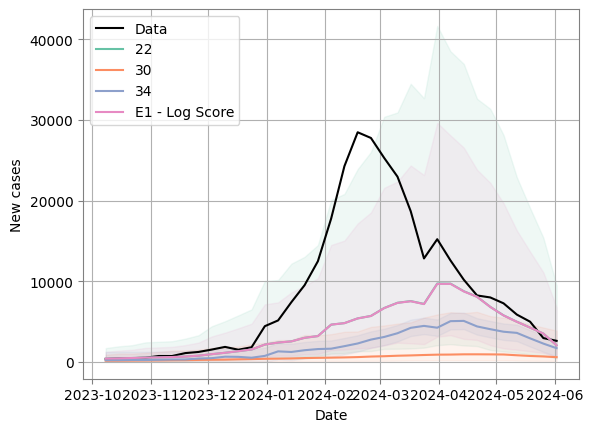

In [19]:
weights_ls = e1.compute_weights(data_ens, metric= 'log_score')

preds_e1_ls = e1.apply_ensemble(weights_ls['weights'])

preds_e1_ls['model_id'] = 'E1 - Log Score'

df_preds_ensemble = pd.concat([df_preds_end, preds_e1_ls], axis = 0)

plot_preds(data, df_preds_ensemble)

In [20]:
weights_ls

{'weights': array([1., 0., 0.]), 'loss': 335.2036682611022}

Optimize the weights using the CRPS:

<Axes: xlabel='Date', ylabel='New cases'>

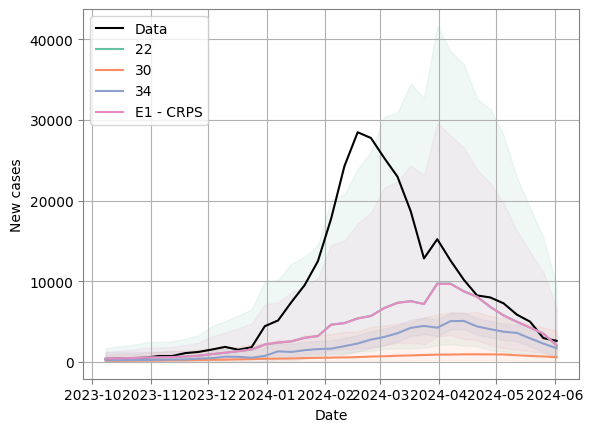

In [21]:
weights_crps = e1.compute_weights(data_ens, metric= 'crps')
preds_e1_crps = e1.apply_ensemble(weights = weights_crps['weights'])

preds_e1_crps['model_id'] = 'E1 - CRPS'

df_preds_ensemble = pd.concat([df_preds_end, preds_e1_crps], axis = 0)

plot_preds(data, df_preds_ensemble)

Compare the ensembles outputs using the linear mixture:

<Axes: xlabel='Date', ylabel='New cases'>

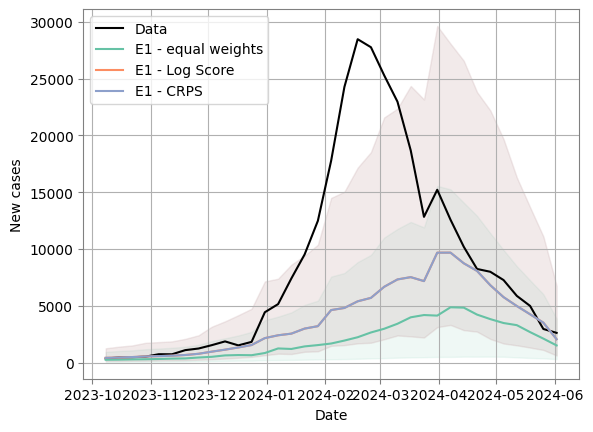

In [22]:
df_ensembles = pd.concat([preds_e1, preds_e1_ls, preds_e1_crps])

plot_preds(data, df_ensembles)

Ensembles applying the logarithmic pooling with equal weights: 

<Axes: xlabel='Date', ylabel='New cases'>

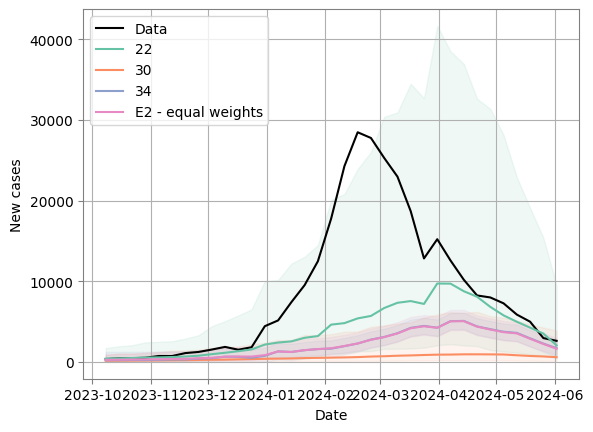

In [23]:
e2 = Ensemble(df = df_preds_end,
        order_models = [22, 30, 34], 
        dist = 'log_normal',
        fn_loss = 'median')

preds_e2 = e2.apply_ensemble(weights = [1/3,1/3,1/3])

preds_e2['model_id'] = 'E2 - equal weights'

df_preds_ensemble = pd.concat([df_preds_end, preds_e2], axis = 0)

plot_preds(data, df_preds_ensemble)

Optimizing the weights using the log score

<Axes: xlabel='Date', ylabel='New cases'>

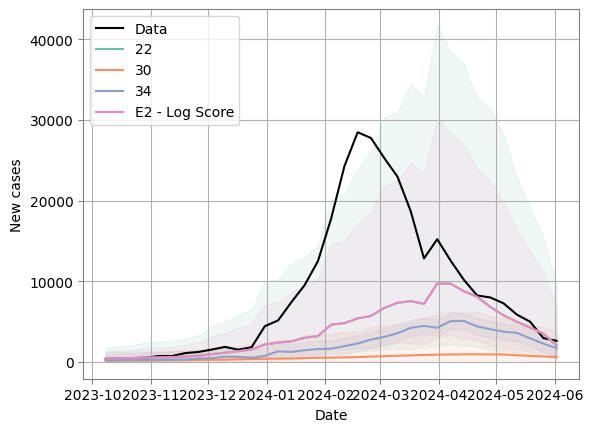

In [24]:
weights_ls = e2.compute_weights(data_ens, metric= 'log_score')

preds_e2_ls = e2.apply_ensemble(weights_ls['weights'])

preds_e2_ls['model_id'] = 'E2 - Log Score'

df_preds_ensemble = pd.concat([df_preds_end, preds_e2_ls], axis = 0)

plot_preds(data, df_preds_ensemble)

Optimize the weigths using the CRPS:

<Axes: xlabel='Date', ylabel='New cases'>

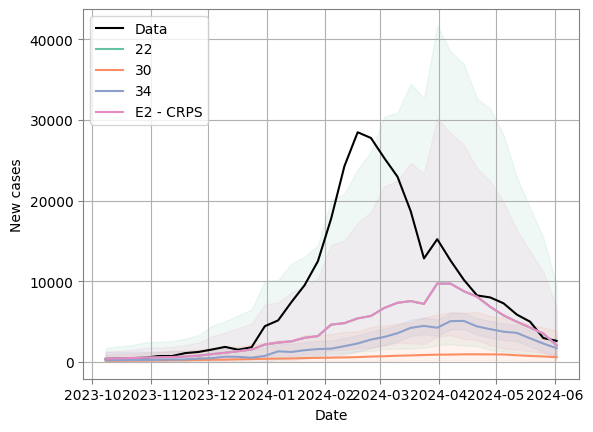

In [25]:
weights_crps = e2.compute_weights(data_ens, metric= 'crps')

preds_e2_crps = e2.apply_ensemble(weights_crps['weights'])

preds_e2_crps['model_id'] = 'E2 - CRPS'

df_preds_ensemble = pd.concat([df_preds_end, preds_e2_crps], axis = 0)

plot_preds(data, df_preds_ensemble)

Compare the ensembles outputs using logarithmic pooling:

<Axes: xlabel='Date', ylabel='New cases'>

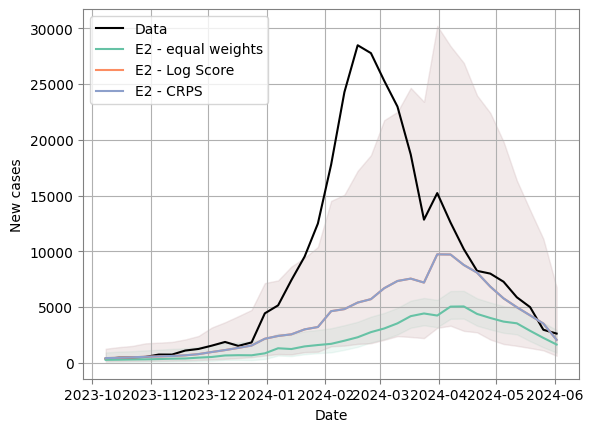

In [26]:
df_ensembles = pd.concat([preds_e2, preds_e2_ls, preds_e2_crps])

plot_preds(data, df_ensembles)

Compare the linear mixture (E1) with the logarithmic pooling (E2)

<Axes: xlabel='Date', ylabel='New cases'>

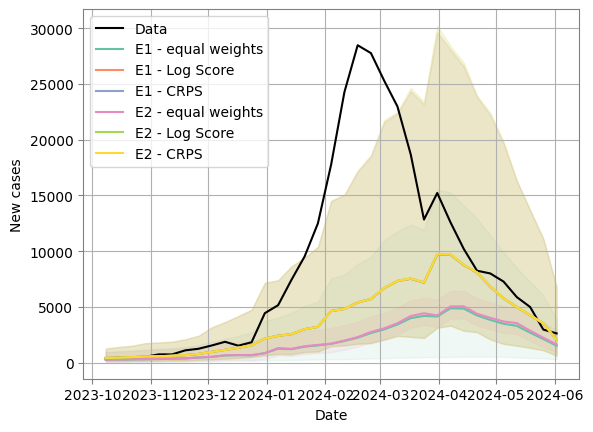

In [27]:
df_ensembles = pd.concat([preds_e1, preds_e1_ls, preds_e1_crps,
                          preds_e2, preds_e2_ls, preds_e2_crps])

plot_preds(data, df_ensembles)

Comparing the ensemble with logarithmic pooling using normal and log normal distributions: 

<Axes: xlabel='Date', ylabel='New cases'>

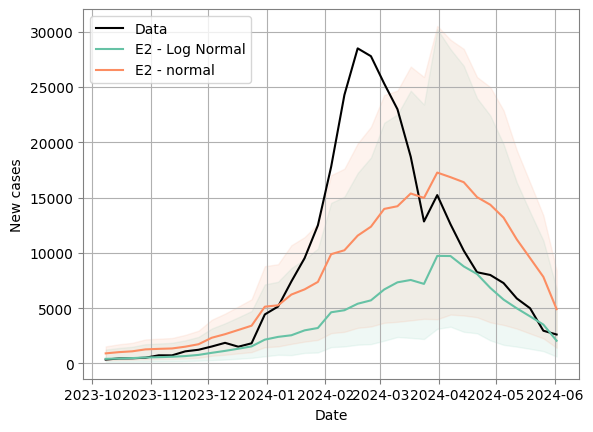

In [28]:
e2_log = Ensemble(df = df_preds_end,
        order_models = [22, 30, 34], 
        dist = 'log_normal',
        fn_loss = 'median')

e2_log.compute_weights(data_ens, metric= 'crps')

# when is not passed weigths to apply_ensemble it used the computed using the  # `compute_weights` method 
preds_e2_log = e2_log.apply_ensemble()

preds_e2_log['model_id'] = 'E2 - Log Normal'

e2_norm = Ensemble(df = df_preds_end,
        order_models = [22, 30, 34], 
        dist = 'normal',
        fn_loss = 'lower')

e2_norm.compute_weights(data_ens, metric= 'crps')

preds_e2_norm = e2_norm.apply_ensemble()

preds_e2_norm['model_id'] = 'E2 - normal'

df_ensembles = pd.concat([preds_e2_log, preds_e2_norm])

plot_preds(data, df_ensembles)
